<a href="https://colab.research.google.com/github/islam-mirajul/YouTube-Exaggerated-Bangla-Titles-Categorization/blob/main/YouTube-Exaggerated-Bangla-Titles-Categorization(CNN-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.models import Model
from keras.layers import *
from keras.utils.np_utils import to_categorical
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/youtube project/youtubeRD-csv.csv')
df.head(3)

,Title,Type
0,"""বেনিংটন ট্রায়াঙ্গল""- যে বন থেকে ফিরে আসা যায...",অতিরঞ্জিত
1,১ বছরের বাচ্চাটিকে মা একলা বন্ধ ঘরে ফেলে রেখে ...,অতিরঞ্জিত
2,১০ জন মানুষ যাদের কে দেখলে বিশ্বাস করতে পারবেন না,অতিরঞ্জিত


In [ ]:
def clean_str(in_str):
    in_str = str(in_str)
    # replace urls with 'url'
    in_str = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", in_str)
    in_str = re.sub(r'([^\s\w]|_)+', '', in_str)
    return in_str.strip().lower()


df['text'] = df['Title'].apply(clean_str)

In [ ]:
df.head(20)

,Title,Type,text
0,"""বেনিংটন ট্রায়াঙ্গল""- যে বন থেকে ফিরে আসা যায...",অতিরঞ্জিত,বনটন টরযঙগল য বন থক ফর আস যয ন আসলও সট অসবভবক
1,১ বছরের বাচ্চাটিকে মা একলা বন্ধ ঘরে ফেলে রেখে ...,অতিরঞ্জিত,১ বছরর বচচটক ম একল বনধ ঘর ফল রখ চল যয তরপর ক হ...
2,১০ জন মানুষ যাদের কে দেখলে বিশ্বাস করতে পারবেন না,অতিরঞ্জিত,১০ জন মনষ যদর ক দখল বশবস করত পরবন ন
3,১০ জন মানুষ যারা বোকামী করে তাদের জীবন হারিয়েছে,সামঞ্জস্যপূর্ণ,১০ জন মনষ যর বকম কর তদর জবন হরযছ
4,10 টি অবাক করে দেয়া ফ্যাক্ট আপনি আগে জানতেন না,অতিরঞ্জিত,10 ট অবক কর দয ফযকট আপন আগ জনতন ন
5,10 টি অবিশ্বাস্য ফ্যাক্ট যা আপনি আগে জানতেন না,অতিরঞ্জিত,10 ট অবশবসয ফযকট য আপন আগ জনতন ন
6,10 টি অবিশ্বাস্য বেহুদা গ্যাজেট দেখে হাসবেন না...,অতিরঞ্জিত,10 ট অবশবসয বহদ গযজট দখ হসবন ন কদবন
7,১০ টি উদ্ভট জাপানি আবিষ্কার যা আপনার বিশ্বাস ক...,অতিরঞ্জিত,১০ ট উদভট জপন আবষকর য আপনর বশবস করতও কষট হব
8,১০ টি জিনিস যার কাজ আপনি জানেন না,সামঞ্জস্যপূর্ণ,১০ ট জনস যর কজ আপন জনন ন
9,১০ টি প্রানী যারা হুবহু মানুষের মত করে কথা বলত...,অতিরঞ্জিত,১০ ট পরন যর হবহ মনষর মত কর কথ বলত পর


In [ ]:
df.Type.value_counts()

সামঞ্জস্যপূর্ণ    928
অতিরঞ্জিত         871
Name: Type, dtype: int64

In [ ]:
df['l'] = df['Title'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(df.l.mean()))
print("max length of sentence: " + str(df.l.max()))
print("std dev length of sentence: " + str(df.l.std()))

mean length of sentence: 10.361867704280156
max length of sentence: 26
std dev length of sentence: 3.9353383237275597


In [ ]:
sequence_length = 26

In [ ]:
max_features = 20000 # this is the number of words we care about

tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>')
tokenizer.fit_on_texts(df['Title'].values)

# this takes our sentences and replaces each word with an integer
X = tokenizer.texts_to_sequences(df['Title'].values)

# we then pad the sequences so they're all the same length (sequence_length)
X = pad_sequences(X, sequence_length)

y = pd.get_dummies(df['Type']).values

# where there isn't a test set, Kim keeps back 10% of the data for testing, I'm going to do the same since we have an ok amount to play with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("test set size " + str(len(X_test)))

test set size 360


In [ ]:
from keras import regularizers
embedding_dim = 200
num_filters = 100

inputs = Input(shape=(sequence_length,), dtype='int32')

embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=sequence_length)(inputs)

reshape = Reshape((sequence_length, embedding_dim, 1))(embedding_layer)


conv_0 = Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)


concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)


dropout = Dropout(0.5)(flatten)
output = Dense(units=2, activation='sigmoid')(dropout)

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 26)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 26, 200)      4000000     input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 26, 200, 1)   0           embedding[0][0]                  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 1, 100)   60100       reshape[0][0]                    
______________________________________________________________________________________________

In [ ]:
batch_size = 32 # Kim uses 50 here, I have a slightly smaller sample size than num
history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/50
36/36 [==============================] - 21s 102ms/step - loss: 5.5546 - accuracy: 0.4722 - val_loss: 0.8323 - val_accuracy: 0.4410
Epoch 2/50
36/36 [==============================] - 3s 84ms/step - loss: 0.7593 - accuracy: 0.5148 - val_loss: 0.6964 - val_accuracy: 0.5590
Epoch 3/50
36/36 [==============================] - 3s 84ms/step - loss: 0.6953 - accuracy: 0.4978 - val_loss: 0.6935 - val_accuracy: 0.5590
Epoch 4/50
36/36 [==============================] - 3s 84ms/step - loss: 0.6937 - accuracy: 0.5246 - val_loss: 0.6929 - val_accuracy: 0.5590
Epoch 5/50
36/36 [==============================] - 3s 86ms/step - loss: 0.6941 - accuracy: 0.4760 - val_loss: 0.6938 - val_accuracy: 0.4410
Epoch 6/50
36/36 [==============================] - 3s 85ms/step - loss: 0.6939 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5590
Epoch 7/50
36/36 [==============================] - 3s 82ms/step - loss: 0.6935 - accuracy: 0.5137 - val_loss: 0.6924 - val_accuracy: 0.5590
Epoch 8/50


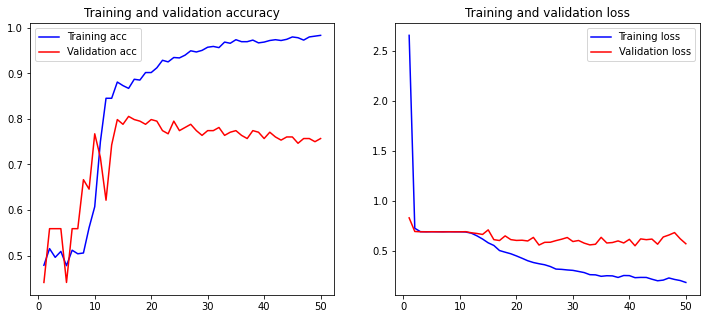

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.7805555555555556

In [ ]:
confusion_matrix(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

array([[123,  50],
       [ 29, 158]])

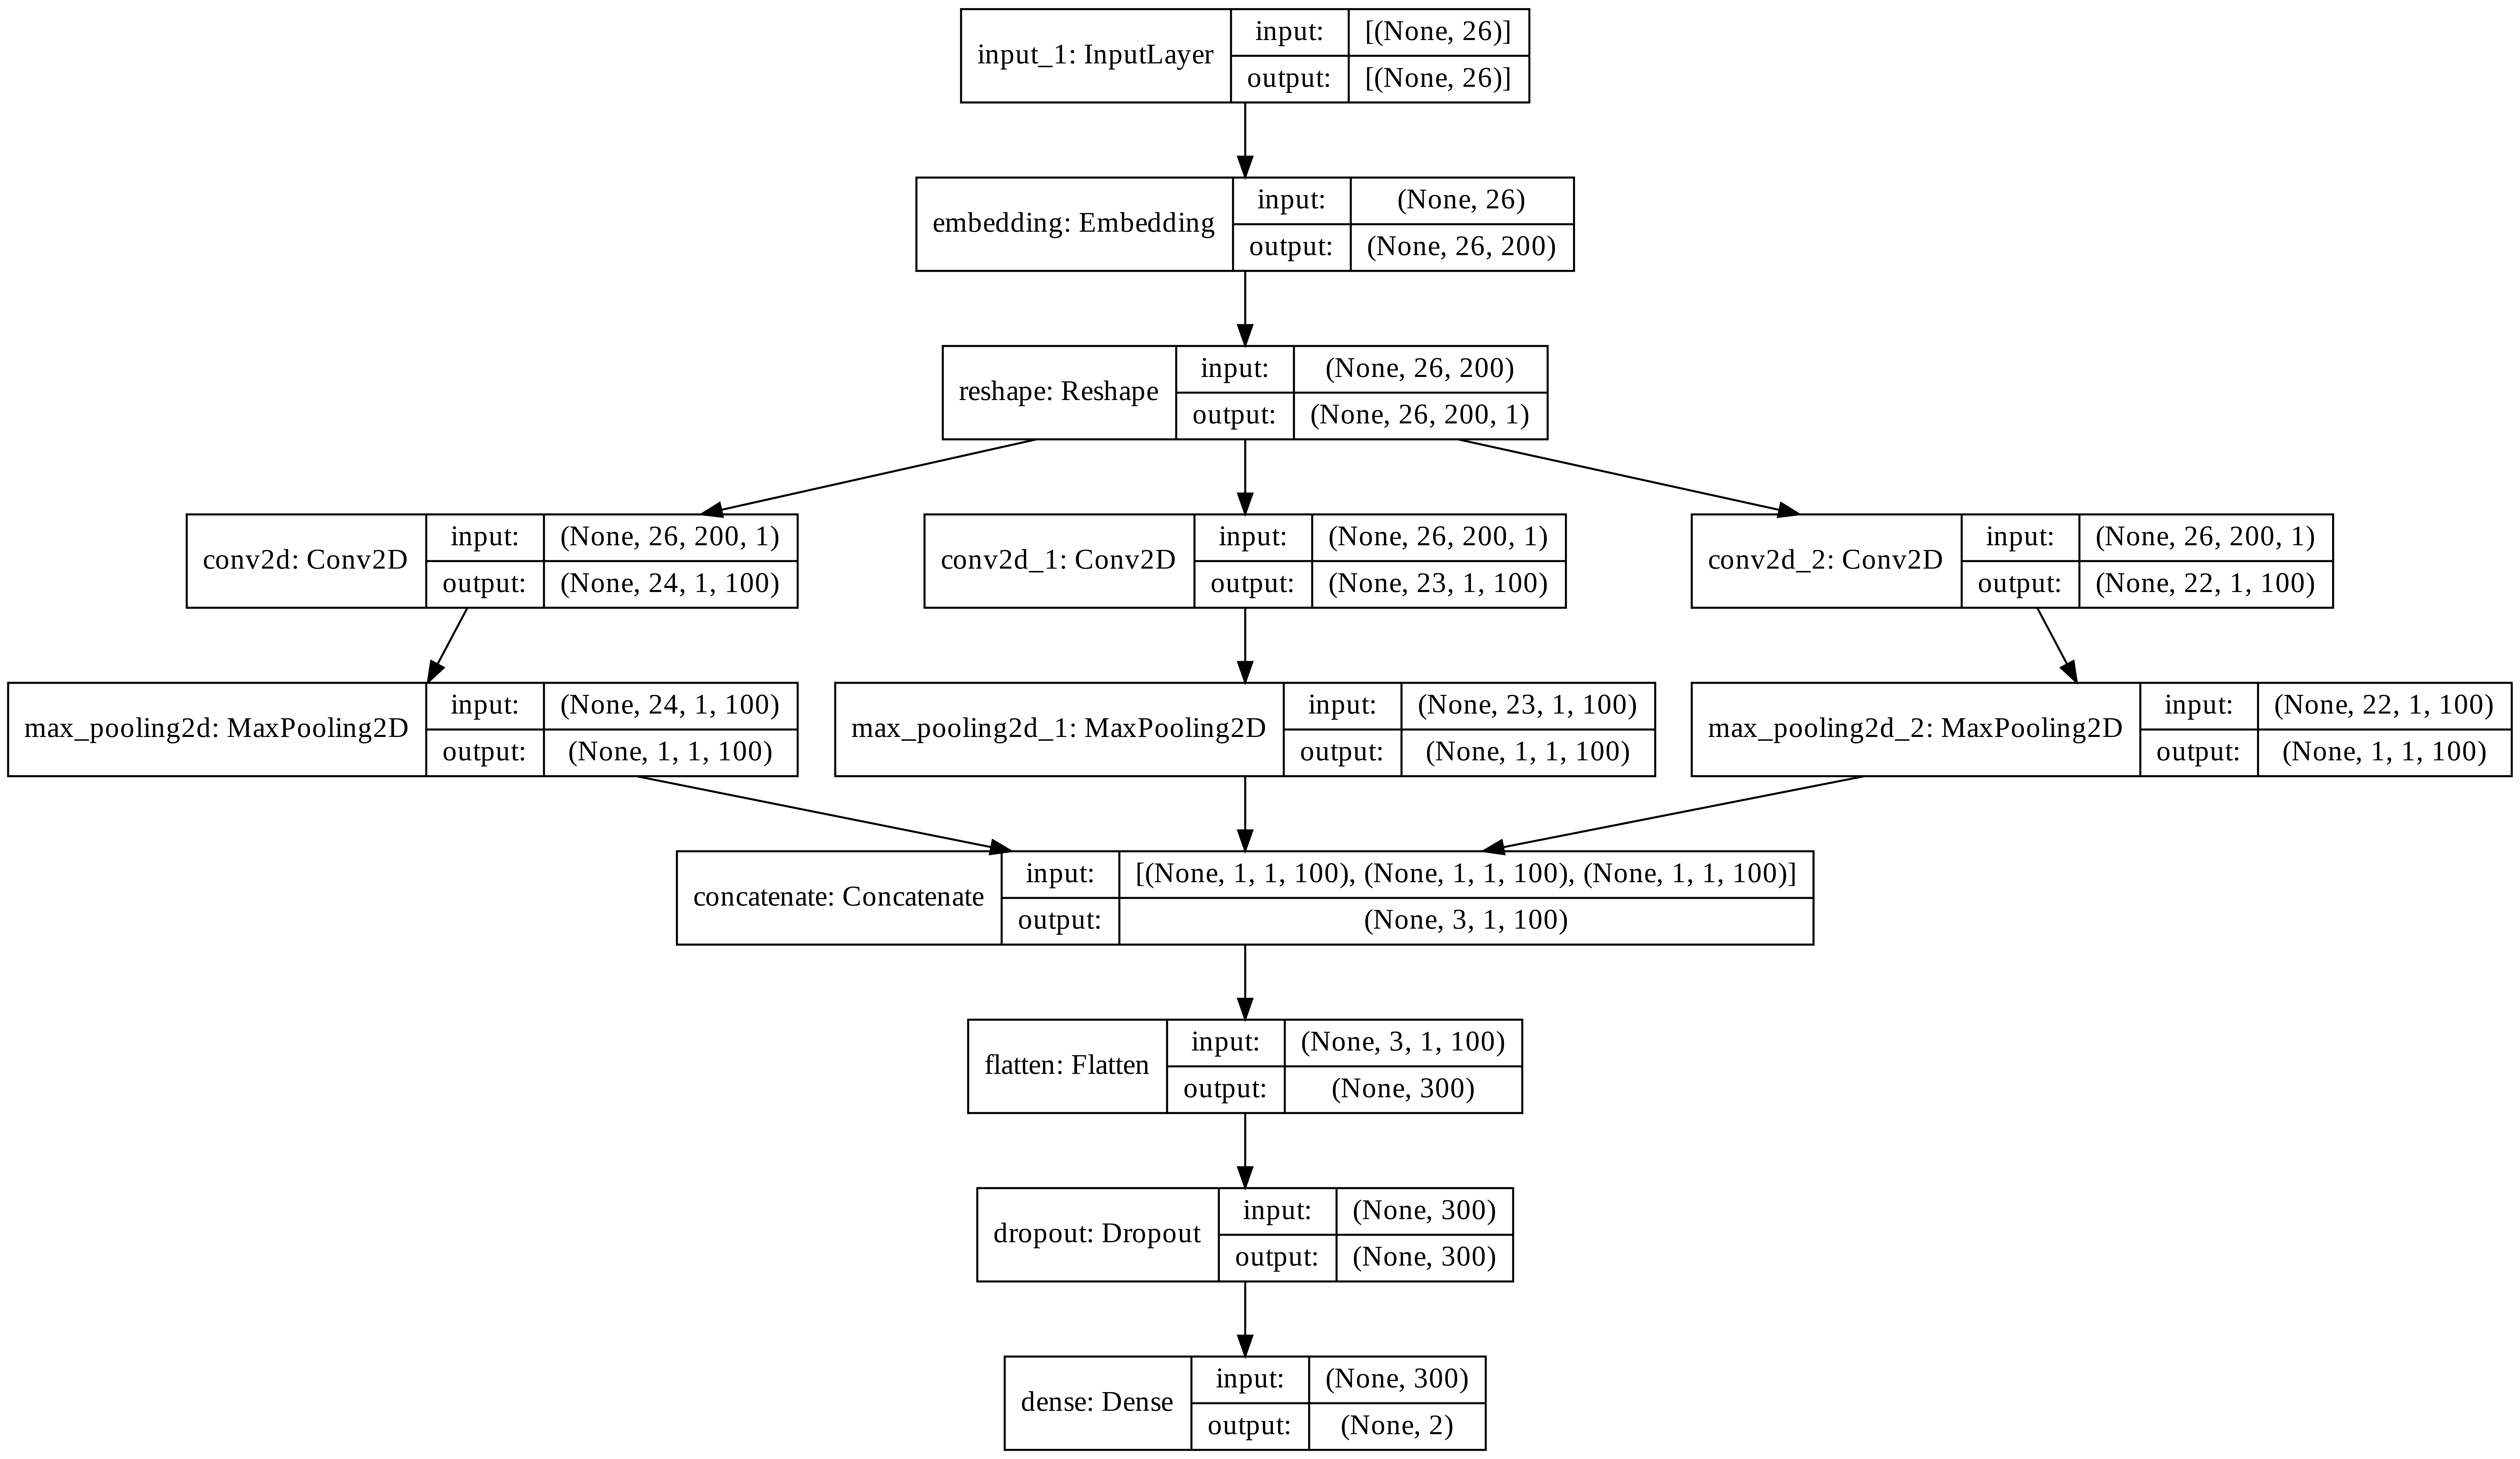

In [ ]:
import tensorflow.keras as keras
keras.utils.plot_model(model, show_shapes=True, dpi=500)